<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичый-осмотр" data-toc-modified-id="Первичый-осмотр-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичый осмотр</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Финальный-тест" data-toc-modified-id="Финальный-тест-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Финальный тест</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
#Импортирую всё, что мне понадобится
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

## Первичый осмотр

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
df_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [5]:
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Слишком много столбцов, поэтому привычный мне первичный осмотр выглядит неуместным. Вместо этого я хочу уделить внимание столбцам, и их расхождению между предоставленными массивами

In [6]:
#вывожу количество столбцов
print('Количество столбцов в исходных данных -',len(df_full.axes[1]))
print('Количество столбцов в тренировочной выборке -',len(df_train.axes[1]))
print('Количество столбцов в тестовой выборке -',len(df_test.axes[1]))

Количество столбцов в исходных данных - 87
Количество столбцов в тренировочной выборке - 87
Количество столбцов в тестовой выборке - 53


В тестовой выборке отсутсвует 34 столбца, необходимо разобратся с этим

Выводы по результатам осмотра: Отсутвует целевой параметр(rougher.output.recovery) его необходимо добавить, используя массив с исходными данными, остальные 33 столбца следует удалить из валидационной выборки, т.к лишние столбцы испортят процесс предсказания модели

## Подготовка данных

In [7]:
#Проверяю расчёт эффективности обогащения
def recovery(c,f,t):
    r_recovery = (c * (f - t)) / (f * (c - t)) * 100
    return r_recovery
total_recovery = []
for i in range(len(df_full)):
    single_recovery = recovery(df_full.loc[i, 'rougher.output.concentrate_au'],df_full.loc[i, 'rougher.input.feed_au'], df_full.loc[i, 'rougher.output.tail_au'])
    total_recovery.append(single_recovery)
print('MAE между фактической эффективностью обогащения и предсказанием -',mean_absolute_error(df_full['rougher.output.recovery'], total_recovery))

MAE между фактической эффективностью обогащения и предсказанием - 9.874045668302637e-15


Данное число невероятно маленькое, что говорит о том, что расчёт эффективности обогащения производится правильно

Теперь, я хочу изучить строки, которые отсутствуют в тестовой выборке 

In [8]:
#Вывожу список пропущенных строк
missing_cols = list(set(list(df_full.columns)) - set(list(df_test.columns)))
missins_cols = missing_cols.sort()
print(missing_cols)

['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail

Выводы, которые можно сделать, изучая вышеприведённый список:

1)Заметно преобладание типа параметра 'output', что указывает на то, что эти данные связаны с продуктом, а не с сырьём

2)Около половины переменных имеют слово 'roughter' в названии, что указывает на то, что они связанны с процедурой флотации

3)Также в этом списке можно заметить ключевые параметры rougher.output.recovery и final.output.recovery, которые необходимо добавить

И ещё, я хочу подвести вывод и сказать что все эти данные относятся к технологическому процессу, и они становятся известны только спустя некоторое время после обогащения. Поэтому я считаю что нужно добавить два столбца с целевыми признаками, а все остальные - удалить

In [9]:
#Изучаю тип данных столбцов
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


Столбец 'date' мне кажется лишним, тк информация в нём не нужна для предсказания, а также он имеет неподходящий тип данных('object')

In [10]:
#Создаю список с совпадающими датами
date_list = list(set(df_full['date']).intersection(df_test['date']))

In [11]:
#Добавляю целевые столбцы
date_data = df_full.query('date in @date_list')
date_data = date_data.sort_values(by = 'date')
date_data = date_data.reset_index(drop = True)
df_test = df_test.sort_values(by = 'date')
df_test = df_test.reset_index(drop = True)
df_test['rougher.output.recovery'] = date_data['rougher.output.recovery']
df_test['final.output.recovery'] = date_data['final.output.recovery']
df_test = df_test.reset_index(drop = True)

In [12]:
#Удаляю лишние столбцы
missing_cols = list(set(list(df_train.columns)) - set(list(df_test.columns)))
df_train = df_train.drop(columns = missing_cols)
df_test = df_test.drop(['date'], axis = 1)
df_train = df_train.drop(['date'], axis = 1)

In [13]:
#ищу пропуски
print(df_train.isna().sum())

final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              29


In [14]:
print(df_test.isna().sum())

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

Пропусков достаточно мало, поэтому я буду заполнять их значениями соседних ячеек

In [15]:
for column_name, column_data in df_train.iteritems():
    df_train[column_name] = df_train[column_name].fillna(method='ffill')
for column_name, column_data in df_test.iteritems():
    df_test[column_name] = df_test[column_name].fillna(method='ffill')

In [16]:
#Ищу дубликаты
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


## Анализ данных

In [17]:
#Осматриваю список столбцов в поиске нужной информации
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Необходимые столбцы с размерами гранул на примере золота:final.output.concentrate_au, primary_cleaner.output.concentrate_au, rougher.output.concentrate_au

In [18]:
#Исследую изменение концетрации элементов на каждом этапе
print('Флотация, концетрация золота -',df_full['rougher.output.concentrate_au'].mean(),'\n Первичная очистка, концетрация золота - ',df_full['primary_cleaner.output.concentrate_au'].mean(),'\n Финальная коцентрация золота -',df_full['final.output.concentrate_au'].mean())
print('Флотация, концетрация серебра -',df_full['rougher.output.concentrate_ag'].mean(),'\n Первичная очистка, концетрация серебра - ',df_full['primary_cleaner.output.concentrate_ag'].mean(),'\n Финальная коцентрация серебра -',df_full['final.output.concentrate_ag'].mean())
print('Флотация, концетрация свинца -',df_full['rougher.output.concentrate_pb'].mean(),'\n Первичная очистка, концетрация свинца - ',df_full['primary_cleaner.output.concentrate_pb'].mean(),'\n Финальная коцентрация свинца -',df_full['final.output.concentrate_pb'].mean())

Флотация, концетрация золота - 19.772000139486316 
 Первичная очистка, концетрация золота -  32.1194004078765 
 Финальная коцентрация золота - 44.0765129419528
Флотация, концетрация серебра - 11.994759359873429 
 Первичная очистка, концетрация серебра -  8.44240807771906 
 Финальная коцентрация серебра - 5.168470373676801
Флотация, концетрация свинца - 7.606272313195003 
 Первичная очистка, концетрация свинца -  9.829529774200518 
 Финальная коцентрация свинца - 9.978894911181722


Выводы из наблюдений за вышеприведёнными значениями:

1)После каждой из процедур, концетрация золота приблизительно вырастала в на 12%, а концетрация серебра падала на 3.5%

2)После флотации концетрация свинца выросла на 2%, я считаю, что это связанно со снижением доли металлов, которые более подверженны процедуре флотации

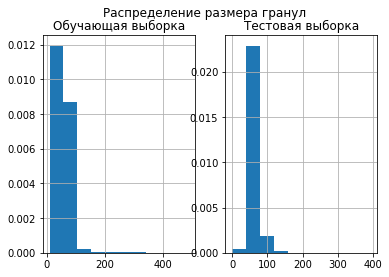

In [19]:
#Анализирую распределение размеров гранул
df_train['rougher.input.feed_size'].hist(ax = plt.subplot(1,2,1),density=True)
plt.title('Обучающая выборка')
df_test['rougher.input.feed_size'].hist(ax = plt.subplot(1,2,2),density=True)
plt.title('Тестовая выборка')
plt.suptitle('Распределение размера гранул')
plt.show()

Распределение схожее, оно не вызовет проблем с обучением модели 

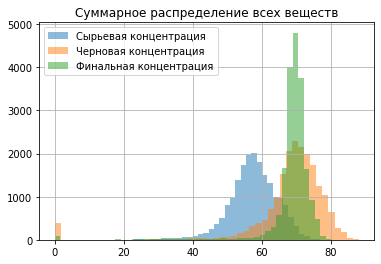

In [20]:
rougher_input_feed_total = rougher_input_feed_total = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol'] + df_full['rougher.input.feed_au']
rougher_input_feed_total.hist(alpha = 0.5, bins = 50, label = 'Cырьевая концентрация')
rougher_output_concentrate_total = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'] + df_full['rougher.output.concentrate_au']
rougher_output_concentrate_total.hist(alpha = 0.5, bins = 50, label = 'Черновая концентрация')
final_concentrate_total = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'] + df_full['final.output.concentrate_au']
final_concentrate_total.hist(alpha = 0.5, bins = 50, label = 'Финальная концентрация')
plt.title('Суммарное распределение всех веществ')
plt.legend()
plt.show()

Обнаружены некорректные данные, произвожу их удаление из обучающего массива

In [21]:
df_train = df_train[df_train['rougher.input.feed_ag'] > 5]
df_train = df_train[df_train['rougher.input.feed_pb'] > 5]
df_train = df_train[df_train['rougher.input.feed_sol'] > 5]
df_train = df_train[df_train['rougher.input.feed_au'] > 5]
df_train

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
232,69.327805,235.362321,15.965913,7.25,1.411462,1547.519929,-499.001284,1553.385069,-501.017689,1499.302235,...,15.021547,-549.354766,12.929922,-550.109454,9.967843,-597.081983,8.021562,-599.602641,11.973194,-599.585535
234,67.533628,229.028598,17.002347,7.25,1.406746,1549.084159,-499.384263,1549.865198,-499.353058,1503.904702,...,15.068504,-549.945571,12.996740,-549.944931,10.055798,-599.466008,8.092485,-600.249114,12.015319,-601.613481
758,73.828410,218.247493,13.032054,7.51,1.494803,1802.407067,-349.699214,1801.059547,-351.758085,1804.792474,...,22.998875,-326.000930,22.007539,-240.994874,24.937551,-351.732542,21.020936,-398.647140,24.988094,-391.849916
759,80.041038,223.382947,13.069281,7.58,1.514161,1582.584178,-349.536384,1583.735630,-351.180108,1582.099962,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519
760,78.592693,226.251569,13.792951,7.58,1.509301,1601.017906,-350.526823,1597.270648,-347.354380,1598.642844,...,24.962970,-402.660058,23.976703,-412.144204,25.011534,-340.282788,20.968156,-399.810501,30.002489,-402.908411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14127,72.582287,105.880296,8.044041,6.66,0.598256,1648.845107,-400.124973,1650.440341,-400.182977,1650.279621,...,23.014369,-500.212424,19.992876,-499.888065,17.977496,-499.967811,12.954171,-500.260455,19.983515,-503.243695
14128,72.001394,108.127972,7.989871,6.66,0.595134,1649.405961,-399.645178,1650.788636,-399.857146,1649.707469,...,23.025088,-501.311668,20.031273,-500.674430,17.953446,-500.681679,13.013927,-500.258257,20.012671,-505.750254
14129,70.004249,108.436718,7.995342,6.66,0.592419,1647.373511,-399.718422,1649.170321,-400.119658,1650.330426,...,23.018880,-500.910903,19.973517,-499.414252,17.957036,-499.519333,12.995216,-500.030232,19.983372,-509.060146
14130,67.796293,111.336787,7.981744,6.66,0.659512,1651.326284,-399.878826,1649.375947,-399.827594,1649.519493,...,23.022083,-501.108490,20.018146,-500.739493,17.998088,-500.267224,12.995547,-500.179650,19.985572,-501.375774


Промежуточный вывод по вышеприведённому анализу: большая часть различных мелких примемесей отсеиваются на процедуре флотации, остальные металлы, такие как серебро, отсеиваются при последующих этапах. Но при этом, процент, которые занимают четыре главных минерала, практически неизменен, после того, как была пройдена процедура флотации

## Модель

In [22]:
def smape(target, predict):
    temp = np.mean(np.abs(target - predict) / ((np.abs(target) + np.abs(predict)) / 2)) * 100
    return(temp)
smape_score = make_scorer(smape, greater_is_better=False)

In [23]:
#Создаю функцию для вычисления итоговово sMAPE
def total_smape(rougher_predictions, rougher_target, final_predictions, final_target):
    total = smape(rougher_target, rougher_predictions) * 0.25 + smape(final_target, final_predictions) * 0.75
    return(total)

In [24]:
#Подготавливаю данные
train_features = df_train.drop(['rougher.output.recovery','final.output.recovery'], axis = 1)
train_target_rougher = df_train['rougher.output.recovery']
train_target_final = df_train['final.output.recovery']
test_features = df_test.drop(['rougher.output.recovery','final.output.recovery'], axis = 1)
test_target_rougher = df_test['rougher.output.recovery']
test_target_final = df_test['final.output.recovery']

In [25]:
#Создаю функцию для теста кросс валидацией
def cross_val_test(model, features, target_rougher, target_final):
    rougher_scores = cross_val_score(model, features, target_rougher, scoring = smape_score, cv = 5)
    print('Средняя оценка флотации - ',rougher_scores.mean())
    final_scores = cross_val_score(model, features, target_final, scoring = smape_score, cv = 5)
    print('Финальная средняя оценка - ',final_scores.mean())
    print('Итоговый sMAPE - ',(rougher_scores * 0.25 + final_scores * 0.75).mean())

In [26]:
#Тестирую древо
grid_space={'max_depth':[3,5,10],
            'min_samples_leaf':[1,2,3],
           }
model = DecisionTreeRegressor(random_state = 12345)
grid = GridSearchCV(model,param_grid=grid_space,cv=3,scoring=smape_score)
model_grid = grid.fit(train_features, train_target_rougher)
print('Лучшие гиперпараметры для флотации это: '+str(model_grid.best_params_))
print('Лучший результат флотации - '+str(model_grid.best_score_))

Лучшие гиперпараметры для флотации это: {'max_depth': 3, 'min_samples_leaf': 3}
Лучший результат флотации - -12.146814045651341


In [27]:
model_grid = grid.fit(train_features, train_target_final)
print('Лучшие гиперпараметры для финального результата это: '+str(model_grid.best_params_))
print('Лучший результат для финальной концетрации - '+str(model_grid.best_score_))

Лучшие гиперпараметры для финального результата это: {'max_depth': 3, 'min_samples_leaf': 1}
Лучший результат для финальной концетрации - -12.017870112785815


In [28]:
model = DecisionTreeRegressor(random_state = 12345, max_depth = 5, min_samples_leaf = 3)
cross_val_test(model, train_features, train_target_rougher, train_target_final)

Средняя оценка флотации -  -21.056847129470093
Финальная средняя оценка -  -10.759181148411875
Итоговый sMAPE -  -13.33359764367643


In [29]:
#Тестирую лин.регрессию
model = LinearRegression()
cross_val_test(model, train_features, train_target_rougher, train_target_final)

Средняя оценка флотации -  -33.23354710267902
Финальная средняя оценка -  -17.248646215438345
Итоговый sMAPE -  -21.244871437248513


Древо решений показало себя лучше, его я и буду использовать далее

Промежуточный вывод: Из двух выбранных алгоритмов линейная регрессия показала лучшие результаты. Также я хочу сообщить о том, что я отказался от использования рандомного леса т.к он требует слишком много ресурсов, и поэтому он не подходит для работы с настолько массивными данными

## Финальный тест

In [30]:
model = DecisionTreeRegressor(random_state = 12345, max_depth = 5, min_samples_leaf = 3)
model.fit(train_features, train_target_rougher)
rougher_predictions = model.predict(test_features)
model = DecisionTreeRegressor(random_state = 12345, max_depth = 5, min_samples_leaf = 2)
model.fit(train_features, train_target_final)
final_predictions = model.predict(test_features)
print('Итоговый sMAPE - ',total_smape(rougher_predictions, test_target_rougher, final_predictions, test_target_final))
model = DummyRegressor()
model.fit(train_features, train_target_rougher)
rougher_predictions = model.predict(test_features)
model = DummyRegressor()
model.fit(train_features, train_target_final)
final_predictions = model.predict(test_features)
print('Итоговый sMAPE примитивного алгоритма - ',total_smape(rougher_predictions, test_target_rougher, final_predictions, test_target_final))


Итоговый sMAPE -  12.448910477912037
Итоговый sMAPE примитивного алгоритма -  8.934570630153388


Итоговый вывод: В данном проекте я исследовал восстановление золота из золотосодержащей руды, я обработал массивы данных, сделал их пригодными для обучения модели. Также я провел исследовательский анализ, в исследовал концетрацию различных минералов, и то, как она меняется на различных этапах очистки. И под конец я обучил модель, которая должна предсказывать процент концетрации золота на этапе флотации и в самом конце процесса.